In [36]:
import pandas as pd 
import geopandas as gpd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# apply saborn dark palette styling 
sns.set_palette("dark")

import sys 
# sys.path.append('/Users/gracecolverd/New_dataset')
import sys 
sys.path.append('/Users/gracecolverd/City_clustering')  
from src.utils import join_pc_map_three_pc

import pandas as pd 
import sys 
sys.path.append('/Users/gracecolverd/City_clustering')
from src.city_cluster import load_bsdata

In [37]:
import os
import pandas as pd
import numpy as np

def extract_run_info(summary_file):
    info = {}
    with open(summary_file, 'r') as f:
        for line in f:
            if ':' in line:
                key, value = line.split(':', 1)
                info[key.strip()] = value.strip()
    
    # Extract specific metrics
    info['Silhouette Score'] = float(info.get('- Silhouette Score', 'NaN'))
    info['Davies-Bouldin Index'] = float(info.get('- Davies-Bouldin Index', 'NaN'))
    info['Calinski-Harabasz Index'] = float(info.get('- Calinski-Harabasz Index', 'NaN'))
    return info

def summarize_results(base_folder):
    results = {}
    metrics = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']

    for cluster_folder in os.listdir(base_folder):
        cluster_path = os.path.join(base_folder, cluster_folder)
        if not os.path.isdir(cluster_path):
            continue
        print(cluster_path)

        num_clusters = int(cluster_folder)
        results[num_clusters] = {metric: [] for metric in metrics}

        cluster_results_path = os.path.join(cluster_path, 'cluster_results')
        print(cluster_results_path)
        for seed_folder in os.listdir(cluster_results_path):
            summary_file = os.path.join(cluster_results_path, seed_folder, 'run_summary_metrics.txt')
            if os.path.exists(summary_file):
                info = extract_run_info(summary_file)
                for metric in metrics:
                    if not np.isnan(info[metric]):
                        results[num_clusters][metric].append(info[metric])

    # Calculate mean, std, and count for each metric
    summary_data = []
    for num_clusters, cluster_data in results.items():
        row = {'Num Clusters': num_clusters}
        for metric in metrics:
            values = np.array(cluster_data[metric])
            row[f'{metric} Mean'] = np.mean(values)
            row[f'{metric} Std'] = np.std(values)
            row[f'{metric} Count'] = len(values)
        summary_data.append(row)

    # Create DataFrame
    df = pd.DataFrame(summary_data)
    
    # Sort by number of clusters
    df = df.sort_values('Num Clusters')
    
    return df

# Usage
base_folder = '/Users/gracecolverd/City_clustering/clustering_results/spectral'
results_df = summarize_results(base_folder)
print(results_df)

# Optionally, save to CSV
# results_df.to_csv('clustering_summary.csv', index=False)

/Users/gracecolverd/City_clustering/clustering_results/spectral/9
/Users/gracecolverd/City_clustering/clustering_results/spectral/9/cluster_results
/Users/gracecolverd/City_clustering/clustering_results/spectral/11
/Users/gracecolverd/City_clustering/clustering_results/spectral/11/cluster_results
/Users/gracecolverd/City_clustering/clustering_results/spectral/7
/Users/gracecolverd/City_clustering/clustering_results/spectral/7/cluster_results
/Users/gracecolverd/City_clustering/clustering_results/spectral/6
/Users/gracecolverd/City_clustering/clustering_results/spectral/6/cluster_results
/Users/gracecolverd/City_clustering/clustering_results/spectral/10
/Users/gracecolverd/City_clustering/clustering_results/spectral/10/cluster_results
/Users/gracecolverd/City_clustering/clustering_results/spectral/8
/Users/gracecolverd/City_clustering/clustering_results/spectral/8/cluster_results
/Users/gracecolverd/City_clustering/clustering_results/spectral/12
/Users/gracecolverd/City_clustering/clust

In [5]:
results_df.sort_values('Calinski-Harabasz Index Mean', ascending=False)

,Num Clusters,Silhouette Score Mean,Silhouette Score Std,Silhouette Score Count,Davies-Bouldin Index Mean,Davies-Bouldin Index Std,Davies-Bouldin Index Count,Calinski-Harabasz Index Mean,Calinski-Harabasz Index Std,Calinski-Harabasz Index Count
2,7,0.431082,0.001827,400,0.699708,0.000542,400,131.793256,0.567622,400
5,8,0.436240,0.007092,400,0.645315,0.015585,400,131.695654,4.224548,400
4,10,0.421121,0.018228,400,0.805030,0.054772,400,129.415956,7.156675,400
0,9,0.424412,0.007462,400,0.755833,0.019125,400,126.558369,3.326284,400
1,11,0.398219,0.018115,400,0.726159,0.067283,400,118.072617,9.330029,400
6,12,0.396165,0.024977,400,0.708082,0.080268,400,116.841040,10.631501,400
3,6,0.404554,0.003706,400,0.767110,0.006577,400,110.706736,1.673340,400


In [66]:
import os
import pandas as pd
import numpy as np

def extract_run_info(summary_file):
    info = {}
    with open(summary_file, 'r') as f:
        for line in f:
            if ':' in line:
                key, value = line.split(':', 1)
                info[key.strip()] = value.strip()
    
    # Extract specific metrics
    info['Silhouette Score'] = float(info.get('- Silhouette Score', 'NaN'))
    info['Davies-Bouldin Index'] = float(info.get('- Davies-Bouldin Index', 'NaN'))
    info['Calinski-Harabasz Index'] = float(info.get('- Calinski-Harabasz Index', 'NaN'))
    return info

def summarize_results_smple(base_folder):
    results = []
    metrics = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']

    for cluster_folder in os.listdir(base_folder):
        cluster_path = os.path.join(base_folder, cluster_folder)
        print(cluster_path)
        if not os.path.isdir(cluster_path):
            continue
        
        num_clusters = int(cluster_folder)
        
        summary_file = os.path.join(cluster_path, 'run_summary.txt')
        
        if os.path.exists(summary_file):
            info = extract_run_info(summary_file)
            row = {'Num Clusters': num_clusters}
            for metric in metrics:
                row[metric] = info[metric]
            results.append(row)

    # Create DataFrame
    df = pd.DataFrame(results)
    
    # Sort by number of clusters
    # df = df.sort_values('Num Clusters')
    
    return df


def summarize_results_smple_rs(base_folder):
    results = []
    metrics = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']

    for cluster_folder in os.listdir(base_folder):
        cluster_path = os.path.join(base_folder, cluster_folder)
        print(cluster_path)
        if not os.path.isdir(cluster_path):
            continue
        
        num_clusters = int(cluster_folder)
        
        for rs_folder in os.listdir(cluster_path):
            rs_path = os.path.join(cluster_path, rs_folder)
            print(rs_path)
            summary_file = os.path.join(rs_path, 'run_summary.txt')
        
            if os.path.exists(summary_file):
                info = extract_run_info(summary_file)
                row = {'Num Clusters': num_clusters}
                for metric in metrics:
                    row[metric] = info[metric]
                results.append(row)

    # Create DataFrame
    df = pd.DataFrame(results)
    
    # Sort by number of clusters
    # df = df.sort_values('Num Clusters')
    
    return df

def summarize_results_smple_rs_sc(base_folder):
    results = []
    metrics = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']

    for cluster_folder in os.listdir(base_folder):
        cluster_path = os.path.join(base_folder, cluster_folder)
        if not os.path.isdir(cluster_path):
            continue
        
        num_clusters = int(cluster_folder)
        
        for af_folder in os.listdir(cluster_path):
            af_path = os.path.join(cluster_path, af_folder)
            for rs_path in os.listdir(af_path):
                rs_folder = os.path.join(af_path, rs_path)
                
                summary_file = os.path.join(rs_folder, 'run_summary.txt')
        
                if os.path.exists(summary_file):
                    info = extract_run_info(summary_file)
                    row = {'Num Clusters': num_clusters}
                    for metric in metrics:
                        row[metric] = info[metric]
                    row['affinity'] = af_folder  
                    results.append(row) 


    # Create DataFrame
    df = pd.DataFrame(results)
    
    # Sort by number of clusters
    # df = df.sort_values('Num Clusters')
    
    return df


In [67]:


base_folder = '/Users/gracecolverd/City_clustering/vis/spectral'
sc_results = summarize_results_smple_rs_sc(base_folder)
sc_results

,Num Clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,affinity
0,9,0.4025,0.7667,136.2253,nearest_neighbors
1,9,0.4142,0.7843,124.1301,rbf
2,11,0.4016,0.7562,132.9209,nearest_neighbors
3,11,0.3912,0.7493,121.0819,rbf
4,7,0.4368,0.7290,141.7630,nearest_neighbors
5,7,0.4298,0.6998,131.3973,rbf
6,6,0.4333,0.7344,132.7168,nearest_neighbors
7,6,0.4036,0.7640,110.3168,rbf
8,10,0.4030,0.7513,132.7499,nearest_neighbors
9,10,0.4194,0.8046,126.3587,rbf


In [70]:
sc_results.sort_values('Silhouette Score', ascending=False)

,Num Clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,affinity
14,5,0.4480,0.6945,140.9834,nearest_neighbors
11,8,0.4439,0.6319,136.3882,rbf
4,7,0.4368,0.7290,141.7630,nearest_neighbors
6,6,0.4333,0.7344,132.7168,nearest_neighbors
5,7,0.4298,0.6998,131.3973,rbf
10,8,0.4257,0.7288,141.3642,nearest_neighbors
12,12,0.4239,0.7196,161.3028,nearest_neighbors
9,10,0.4194,0.8046,126.3587,rbf
1,9,0.4142,0.7843,124.1301,rbf
15,5,0.4138,0.7511,125.7395,rbf


In [19]:
base_folder = '/Users/gracecolverd/City_clustering/clustering_results/kmeans'
km_results_df = summarize_results_smple(base_folder)
print(km_results_df)

   Num Clusters  Silhouette Score  Davies-Bouldin Index  \
0             9            0.4412                0.7042   
1            11            0.4545                0.6631   
2             7            0.4547                0.6935   
3             6            0.4330                0.7717   
4            10            0.4493                0.6824   
5             8            0.4477                0.7023   
6            12            0.4467                0.6423   
7             5            0.4531                0.6976   

   Calinski-Harabasz Index  
0                 153.6251  
1                 166.2272  
2                 151.7551  
3                 143.0135  
4                 154.0059  
5                 152.9982  
6                 163.4123  
7                 143.3816  


In [71]:
base_folder = '/Users/gracecolverd/City_clustering/vis/GMM'
gmm_results_df = summarize_results_smple_rs(base_folder)
print(gmm_results_df)

/Users/gracecolverd/City_clustering/vis/GMM/9
/Users/gracecolverd/City_clustering/vis/GMM/9/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/11
/Users/gracecolverd/City_clustering/vis/GMM/11/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/7
/Users/gracecolverd/City_clustering/vis/GMM/7/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/6
/Users/gracecolverd/City_clustering/vis/GMM/6/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/10
/Users/gracecolverd/City_clustering/vis/GMM/10/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/8
/Users/gracecolverd/City_clustering/vis/GMM/8/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/12
/Users/gracecolverd/City_clustering/vis/GMM/12/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/5
/Users/gracecolverd/City_clustering/vis/GMM/5/random_seed_1
   Num Clusters  Silhouette Score  Davies-Bouldin Index  \
0             9            0.1997                1.0105   
1            11            0

In [46]:
base_folder = '/Users/gracecolverd/City_clustering/vis/GMM'
gmm_results_df = summarize_results_smple_rs(base_folder)
print(gmm_results_df)

/Users/gracecolverd/City_clustering/vis/GMM/9
/Users/gracecolverd/City_clustering/vis/GMM/9/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/11
/Users/gracecolverd/City_clustering/vis/GMM/11/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/7
/Users/gracecolverd/City_clustering/vis/GMM/7/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/6
/Users/gracecolverd/City_clustering/vis/GMM/6/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/10
/Users/gracecolverd/City_clustering/vis/GMM/10/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/8
/Users/gracecolverd/City_clustering/vis/GMM/8/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/12
/Users/gracecolverd/City_clustering/vis/GMM/12/random_seed_1
/Users/gracecolverd/City_clustering/vis/GMM/5
/Users/gracecolverd/City_clustering/vis/GMM/5/random_seed_1
   Num Clusters  Silhouette Score  Davies-Bouldin Index  \
0             9            0.2578                0.9022   
1            11            0

In [72]:
gmm_results_df.sort_values('Davies-Bouldin Index')


,Num Clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
2,7,0.3523,0.8446,73.4523
5,8,0.2216,0.9699,39.0725
0,9,0.1997,1.0105,45.8580
6,12,0.2237,1.0262,51.6248
3,6,0.2281,1.0930,36.1263
7,5,0.2391,1.1301,39.0553
1,11,0.2041,1.2018,46.6270
4,10,0.1791,1.2450,41.2756


In [47]:
# ninit = 100
gmm_results_df.sort_values('Davies-Bouldin Index')

,Num Clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
2,7,0.3523,0.8446,73.4523
4,10,0.2669,0.8494,57.7898
6,12,0.2778,0.8543,63.6632
1,11,0.2713,0.8702,58.9977
7,5,0.3391,0.8849,65.7917
0,9,0.2578,0.9022,53.8593
5,8,0.2728,0.9492,55.8881
3,6,0.2331,1.0778,35.4241


In [45]:
gmm_results_df.sort_values('Davies-Bouldin Index')

,Num Clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
4,10,0.3324,0.7666,86.0819
7,5,0.3433,0.8022,69.5121
1,11,0.3382,0.8399,90.4292
3,6,0.2705,0.8448,51.1608
5,8,0.2987,0.9186,70.3975
2,7,0.1723,0.9828,35.5833
0,9,0.2293,1.2198,48.9220
6,12,0.1423,1.7711,41.8062


In [24]:
km_results_df.sort_values('Davies-Bouldin Index')

,Num Clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
6,12,0.4467,0.6423,163.4123
1,11,0.4545,0.6631,166.2272
4,10,0.4493,0.6824,154.0059
2,7,0.4547,0.6935,151.7551
7,5,0.4531,0.6976,143.3816
5,8,0.4477,0.7023,152.9982
0,9,0.4412,0.7042,153.6251
3,6,0.4330,0.7717,143.0135


In [96]:
# check city stability 

def extract_run_info_city(summary_file):
    info = {}
    with open(summary_file, 'r') as f:
        for line in f:
            if ':' in line:
                key, value = line.split(':', 1)
                info[key.strip()] = value.strip()
    
    # Extract specific metrics
    info['Overall average stability:'] = float(info.get('Overall average stability:', 'NaN'))
    info['Cities < 0.5'] = float(info.get('Number of cities with stability < 0.5:', 'NaN'))
    info['Cities < 0.8'] = float(info.get('Number of cities with stability < 0.8: 2', 'NaN'))
    return info


extract_run_info_city('/Users/gracecolverd/City_clustering/clustering_results/8/num_runs_400/run_summary.txt')

{'random seeds': '400',
 'Date': '2024-09-27 16:07:17',
 'Overall average stability': '0.988',
 'Number of cities with stability < 0.5': '0',
 'Number of cities with stability < 0.8': '2',
 'Overall average stability:': nan,
 'Cities < 0.5': nan,
 'Cities < 0.8': nan}

In [97]:
extract_run_info_city('/Users/gracecolverd/City_clustering/clustering_results/7/num_runs_400/run_summary.txt')

{'random seeds': '400',
 'Date': '2024-09-27 16:07:07',
 'Overall average stability': '0.995',
 'Number of cities with stability < 0.5': '0',
 'Number of cities with stability < 0.8': '1',
 'Overall average stability:': nan,
 'Cities < 0.5': nan,
 'Cities < 0.8': nan}

In [17]:

def main():
    results_folder = "/Volumes/T9/City_clustering/results"
    df = summarize_results(results_folder)
    
    # Display the table
    print("\nResults Summary:")
    # print(tabulate(df, headers='keys', tablefmt='pretty', floatfmt=".4f"))
    print(df)
    
    # Optionally, save to CSV
    csv_path = 'clustering_results_summary.csv'
    df.to_csv(csv_path, index=False)
    print(f"\nResults summary saved to: {csv_path}")
    
    return df 


df = main()

resv3_clustering_data_clusters_5
/Volumes/T9/City_clustering/results/resv3_clustering_data_clusters_5/resv3_spectral_clustering_5/run_summary.txt
resv3_clustering_data_clusters_6
/Volumes/T9/City_clustering/results/resv3_clustering_data_clusters_6/resv3_spectral_clustering_6/run_summary.txt
resv3_clustering_data_clusters_7
/Volumes/T9/City_clustering/results/resv3_clustering_data_clusters_7/resv3_spectral_clustering_7/run_summary.txt
resv3_clustering_data_clusters_8
/Volumes/T9/City_clustering/results/resv3_clustering_data_clusters_8/resv3_spectral_clustering_8/run_summary.txt
resv3_clustering_data_clusters_9
/Volumes/T9/City_clustering/results/resv3_clustering_data_clusters_9/resv3_spectral_clustering_9/run_summary.txt
resv3_clustering_data_clusters_11
/Volumes/T9/City_clustering/results/resv3_clustering_data_clusters_11/resv3_spectral_clustering_11/run_summary.txt
resv3_clustering_data_clusters_10
/Volumes/T9/City_clustering/results/resv3_clustering_data_clusters_10/resv3_spectral_cl

In [22]:
df.sort_values('Davies-Bouldin Index', ascending=False)

,Run Name,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Mean Adjusted Rand Index,Std Dev of Adjusted Rand Index
9,resv3_clustering_data_clusters_14,0.3470,0.8302,106.5522,0.6992,0.1240
6,resv3_clustering_data_clusters_10,0.4179,0.7995,127.1069,0.6558,0.1834
5,resv3_clustering_data_clusters_11,0.4029,0.7970,117.2040,0.9169,0.1310
1,resv3_clustering_data_clusters_6,0.4028,0.7711,109.7852,1.0000,0.0000
0,resv3_clustering_data_clusters_5,0.4414,0.7085,139.4376,0.9948,0.0104
4,resv3_clustering_data_clusters_9,0.4443,0.7080,135.8826,0.6449,0.2058
10,resv3_clustering_data_clusters_15,0.3090,0.7055,85.3764,0.6989,0.1439
8,resv3_clustering_data_clusters_13,0.3752,0.7022,108.6608,0.7598,0.1393
2,resv3_clustering_data_clusters_7,0.4335,0.6987,132.8437,0.9434,0.0866
7,resv3_clustering_data_clusters_12,0.4169,0.6774,121.4807,0.9576,0.0571


<AxesSubplot: xlabel='Run Name'>

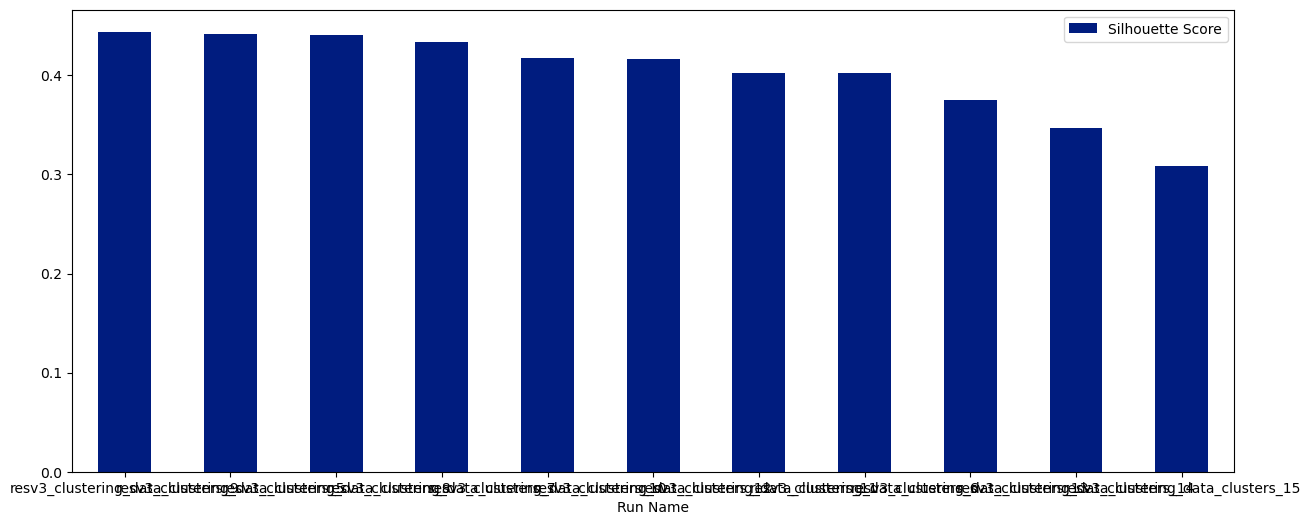

In [19]:
# visualise df 
df.plot.bar(x='Run Name', y='Silhouette Score', rot=0, figsize=(15, 6))

In [53]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set random seed
np.random.seed(0)

def load_and_prepare_data(input_path):
    data = pd.read_csv(input_path)
    data = data[data['TCITY15NM'] != 'London'].copy()
    X = data.drop(columns=['TCITY15NM'])
    data_cols = X.columns.tolist()
    return X, data_cols

def train_spectral_model(X_train, num_clusters):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    X_normalized = normalize(X_scaled)
    pca = PCA(n_components=2)
    X_principal = pca.fit_transform(X_normalized)
    
    spectral_model_rbf = SpectralClustering(n_clusters=num_clusters, affinity='rbf')
    labels_rbf = spectral_model_rbf.fit_predict(X_principal)
    
    silhouette_avg = silhouette_score(X_principal, labels_rbf)
    davies_bouldin = davies_bouldin_score(X_principal, labels_rbf)
    calinski_harabasz = calinski_harabasz_score(X_principal, labels_rbf)
    
    return spectral_model_rbf, scaler, pca, labels_rbf, X_principal, silhouette_avg, davies_bouldin, calinski_harabasz

def stability_analysis(X, n_clusters, n_runs=10):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_principal = pca.fit_transform(X_scaled)
    
    all_labels = []
    for i in range(n_runs):
        spectral_model = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=i)
        labels = spectral_model.fit_predict(X_principal)
        all_labels.append(labels)
    
    n = len(all_labels)
    ari_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            ari = adjusted_rand_score(all_labels[i], all_labels[j])
            ari_matrix[i, j] = ari_matrix[j, i] = ari
    
    mean_ari = np.mean(ari_matrix[np.triu_indices(n, k=1)])
    std_ari = np.std(ari_matrix[np.triu_indices(n, k=1)])
    
    return mean_ari, std_ari, ari_matrix, all_labels

def plot_variable_distributions(X_train, labels, run_path, cols):
    df = pd.DataFrame(X_train, columns=cols)
    df['Cluster'] = labels
    
    plots_folder = os.path.join(run_path, 'variable_distributions')
    os.makedirs(plots_folder, exist_ok=True)
    
    num_cols = 2
    num_rows = (len(cols) + num_cols - 1) // num_cols
    
    # ECDF Plot
    plt.figure(figsize=(11, 5 * num_rows))
    for i, col in enumerate(cols):
        plt.subplot(num_rows, num_cols, i + 1)
        for cluster in np.unique(labels):
            cluster_data = df[df['Cluster'] == cluster][col].dropna()
            sns.ecdfplot(cluster_data, label=f'Cluster {cluster}')
        plt.title(f'ECDF of {col} by Cluster')
        plt.xlabel(col)
        plt.ylabel('ECDF')
        plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(os.path.join(plots_folder, 'ecdf_all_distributions.png'))
    plt.close()
    
    # KDE Plot
    plt.figure(figsize=(11, 5 * num_rows))
    for i, col in enumerate(cols):
        plt.subplot(num_rows, num_cols, i + 1)
        for cluster in np.unique(labels):
            cluster_data = df[df['Cluster'] == cluster][col].dropna()
            sns.kdeplot(cluster_data, fill=True, label=f'Cluster {cluster}')
        plt.title(f'KDE of {col} by Cluster')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(os.path.join(plots_folder, 'kde_all_distributions.png'))
    plt.close()

def save_results(output_path, run_name, spectral_model, scaler, pca, labels, X_principal, silhouette_avg, davies_bouldin, calinski_harabasz, mean_ari, std_ari, ari_matrix):
    run_path = os.path.join(output_path, run_name)
    os.makedirs(run_path, exist_ok=True)
    
    # Save model and preprocessing objects
    joblib.dump(spectral_model, os.path.join(run_path, 'spectral_model_rbf.pkl'))
    joblib.dump(scaler, os.path.join(run_path, 'scaler.pkl'))
    joblib.dump(pca, os.path.join(run_path, 'pca.pkl'))
    
    # Save labels
    pd.DataFrame(labels, columns=['Cluster']).to_csv(os.path.join(run_path, 'labels.csv'), index=False)
    
    # Save PCA results
    pd.DataFrame(X_principal, columns=['PC1', 'PC2']).to_csv(os.path.join(run_path, 'X_principal.csv'), index=False)
    
    # Create and save summary report
    summary = f"""
    Spectral Clustering Run Summary
    ===============================
    Date: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
    
    Clustering Metrics:
    - Silhouette Score: {silhouette_avg:.4f}
    - Davies-Bouldin Index: {davies_bouldin:.4f}
    - Calinski-Harabasz Index: {calinski_harabasz:.4f}
    
    Stability Analysis:
    - Mean Adjusted Rand Index: {mean_ari:.4f}
    - Std Dev of Adjusted Rand Index: {std_ari:.4f}
    
    Files saved:
    - spectral_model_rbf.pkl: Trained Spectral Clustering model
    - scaler.pkl: StandardScaler object
    - pca.pkl: PCA object
    - labels.csv: Cluster labels for each data point
    - X_principal.csv: PCA-transformed data
    - ecdf_all_distributions.png: ECDF plots for all variables
    - kde_all_distributions.png: KDE plots for all variables
    - stability_analysis_heatmap.png: Heatmap of pairwise Adjusted Rand Index
    """
    
    with open(os.path.join(run_path, 'run_summary.txt'), 'w') as f:
        f.write(summary)
    
    # Save stability analysis heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(ari_matrix, annot=True, cmap='YlGnBu')
    plt.title('Adjusted Rand Index Between Runs')
    plt.savefig(os.path.join(run_path, 'stability_analysis_heatmap.png'))
    plt.close()

def main(input_path, num_clusters):
    output_path = "clustering_results"
    
    dataset_name = os.path.basename(input_path).split('_')[0]
    run_name = f'{dataset_name}_spectral_clustering_{num_clusters}'
    
    try:
        X_train, data_cols = load_and_prepare_data(input_path)
        spectral_model_rbf, scaler, pca, labels_rbf, X_principal, silhouette_avg, davies_bouldin, calinski_harabasz = train_spectral_model(X_train, num_clusters)
        
        mean_ari, std_ari, ari_matrix, allabels = stability_analysis(X_train, num_clusters)
        
        save_results(output_path, run_name, spectral_model_rbf, scaler, pca, labels_rbf, X_principal, 
                     silhouette_avg, davies_bouldin, calinski_harabasz, mean_ari, std_ari, ari_matrix)
        
        plot_variable_distributions(X_train, labels_rbf, os.path.join(output_path, run_name), data_cols)
        
        print(f"Run completed successfully. Results saved in {os.path.join(output_path, run_name)}")
        return allabels, X_train 
    except Exception as e:
        print(f"An error occurred: {str(e)}")



Run completed successfully. Results saved in resv3_spectral_clustering_8


In [33]:
df = pd.read_csv( "/Users/gracecolverd/City_clustering/resv3_clustering_data.csv" ) 

In [34]:
allabels[0]

array([2, 0, 0, 2, 6, 2, 4, 4, 2, 5, 2, 0, 4, 2, 6, 5, 6, 6, 6, 2, 6, 2,
       2, 2, 2, 2, 7, 0, 2, 6, 2, 6, 2, 2, 2, 6, 2, 2, 2, 5, 6, 2, 2, 2,
       0, 0, 5, 2, 6, 6, 7, 2, 2, 3, 2, 5, 2, 2, 6, 2, 2, 6, 2, 5, 2, 4,
       6, 6, 2, 2, 5, 6, 6, 2, 5, 2, 6, 2, 2, 2, 1, 2, 2, 2, 2, 2, 6, 2,
       0, 2, 2, 2, 2, 2, 6, 2, 2, 4, 2, 6, 7, 2, 2, 0, 6, 2, 2, 2],
      dtype=int32)

In [37]:
len(allabels)

10

In [49]:
feature_columns  = [ 'perc_standard_houses', 'perc_small_terraces', 'perc_estates','perc_age_Pre-1919','perc_age_1919-1999','perc_one-person_household', 'perc_white', 'perc_asian','perc_economically_active:_employed','perc_economically_inactive' ] 


In [66]:
df.columns.tolist()

['TCITY15NM',
 'perc_standard_houses',
 'perc_small_terraces',
 'perc_estates',
 'perc_age_Pre-1919',
 'perc_age_1919-1999',
 'perc_one-person_household',
 'perc_white',
 'perc_asian',
 'perc_economically_active:_employed',
 'perc_economically_inactive',
 'lab1',
 'lab2',
 'lab3',
 'lab4',
 'lab5',
 'lab6',
 'lab7',
 'lab8',
 'lab9',
 'lab10',
 'stability_score']

In [59]:

def load_clusters(n):
    path = f'/Users/gracecolverd/City_clustering/clustering_results/resv3_spectral_clustering_{n}/labels.csv' 
    raw_cluster_data  =  "/Users/gracecolverd/City_clustering/resv3_clustering_data.csv" 
    res = pd.read_csv(raw_cluster_data)
    labels = pd.read_csv(path)
    if len(res) != len(labels):
        print('err')
        # raise Exception(mismatch in data)
    city_cluster = pd.concat([res, labels], axis=1)
    return city_cluster


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

def plot_estates_by_cluster(df,col ):
    # Get unique clusters
    clusters = sorted(df[col].unique())
    n_clusters = len(clusters)

    # Calculate the number of rows and columns for subplots
    n_cols = min(3, n_clusters)  # Max 3 columns
    n_rows = math.ceil(n_clusters / n_cols)

    # Set up the plot style
    plt.style.use('seaborn')
    
    # Create a figure with subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
    fig.suptitle('Percentage of Estates in Cities by Cluster', fontsize=16)
    
    # Flatten axs array for easier indexing
    axs = axs.flatten() if n_clusters > 1 else [axs]

    for i, cluster in enumerate(clusters):
        # Filter data for the current cluster
        cluster_data = df[df[col] == cluster].sort_values('perc_estates', ascending=False)
        
        # Create the plot for the current cluster
        bars = axs[i].bar(cluster_data['TCITY15NM'], cluster_data['perc_estates'])
        
        # Customize the subplot
        axs[i].set_title(f'Cluster {cluster}')
        axs[i].set_xlabel('City')
        axs[i].set_ylabel('Percentage of Estates')
        axs[i].tick_params(axis='x', rotation=90)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}%',
                        ha='center', va='bottom', rotation=90, fontsize=8)

    # Remove any unused subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Usage
plot_estates_by_cluster(city_cluster,'Cluster')

NameError: name 'city_cluster' is not defined

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_81825/3379270859.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


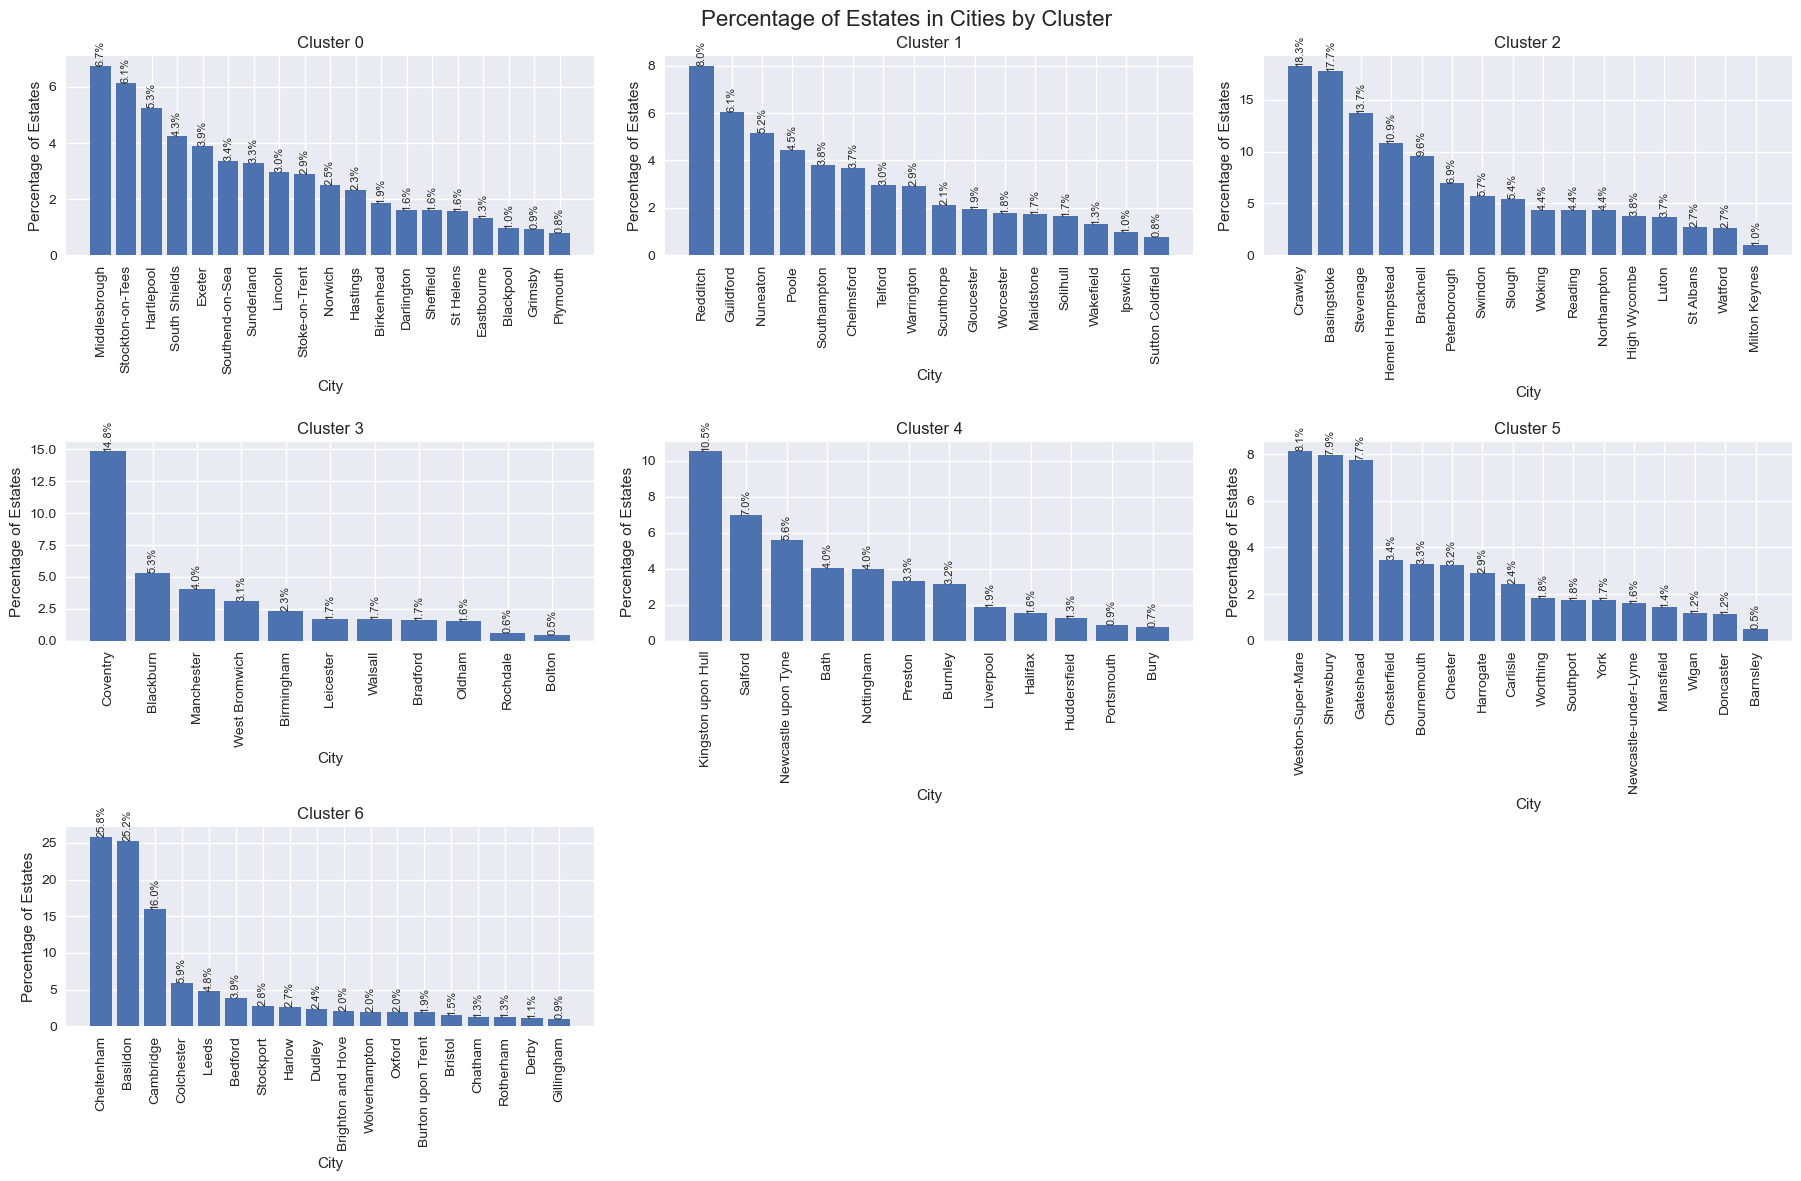

AttributeError: 'NoneType' object has no attribute 'to_csv'

In [91]:
df = pd.read_csv("/Users/gracecolverd/City_clustering/resv3_clustering_data.csv" )
labels = pd.read_csv('/Users/gracecolverd/City_clustering/clustering_results/7/cluster_results/random_seed_1/labels.csv')
df['cluster'] = labels
plot_estates_by_cluster(df, 'cluster')

In [28]:
kmlabels='/Users/gracecolverd/City_clustering/clustering_results/kmeans/12/labels.csv'

In [29]:
kmlabels

'/Users/gracecolverd/City_clustering/clustering_results/kmeans/12/labels.csv'

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_92980/3379270859.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


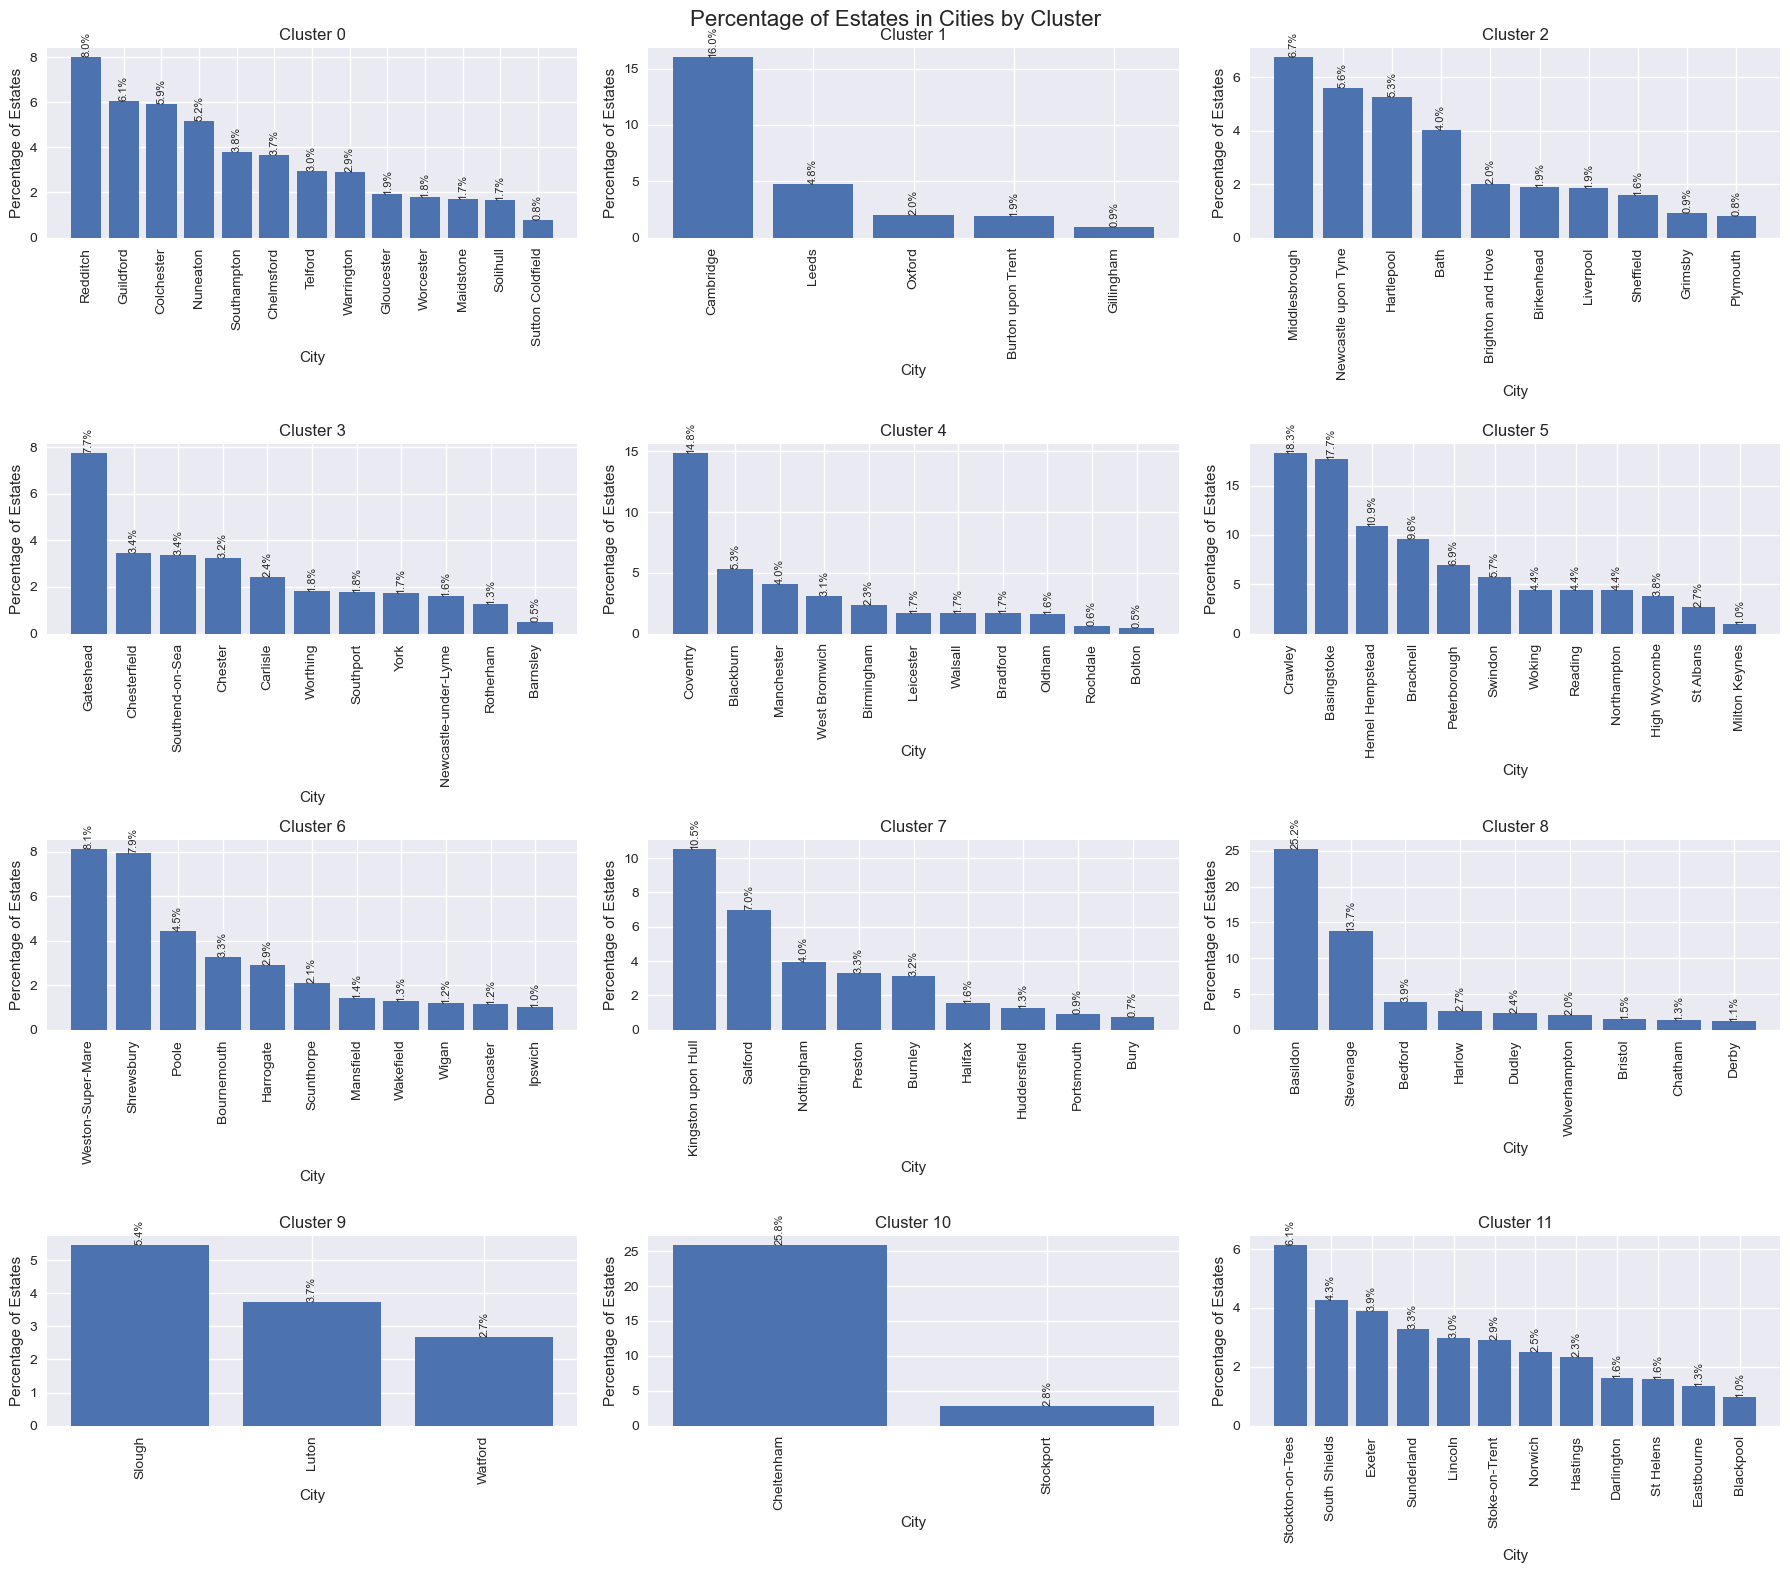

In [33]:
kmlabels=pd.read_csv('/Users/gracecolverd/City_clustering/clustering_results/kmeans/12/labels.csv')
df = pd.read_csv("/Users/gracecolverd/City_clustering/resv3_clustering_data.csv" )
df['cluster'] = kmlabels
plot_estates_by_cluster(df, 'cluster')

In [32]:
df.cluster

0      /Users/gracecolverd/City_clustering/clustering...
1      /Users/gracecolverd/City_clustering/clustering...
2      /Users/gracecolverd/City_clustering/clustering...
3      /Users/gracecolverd/City_clustering/clustering...
4      /Users/gracecolverd/City_clustering/clustering...
                             ...                        
103    /Users/gracecolverd/City_clustering/clustering...
104    /Users/gracecolverd/City_clustering/clustering...
105    /Users/gracecolverd/City_clustering/clustering...
106    /Users/gracecolverd/City_clustering/clustering...
107    /Users/gracecolverd/City_clustering/clustering...
Name: cluster, Length: 108, dtype: object

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_81825/3379270859.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


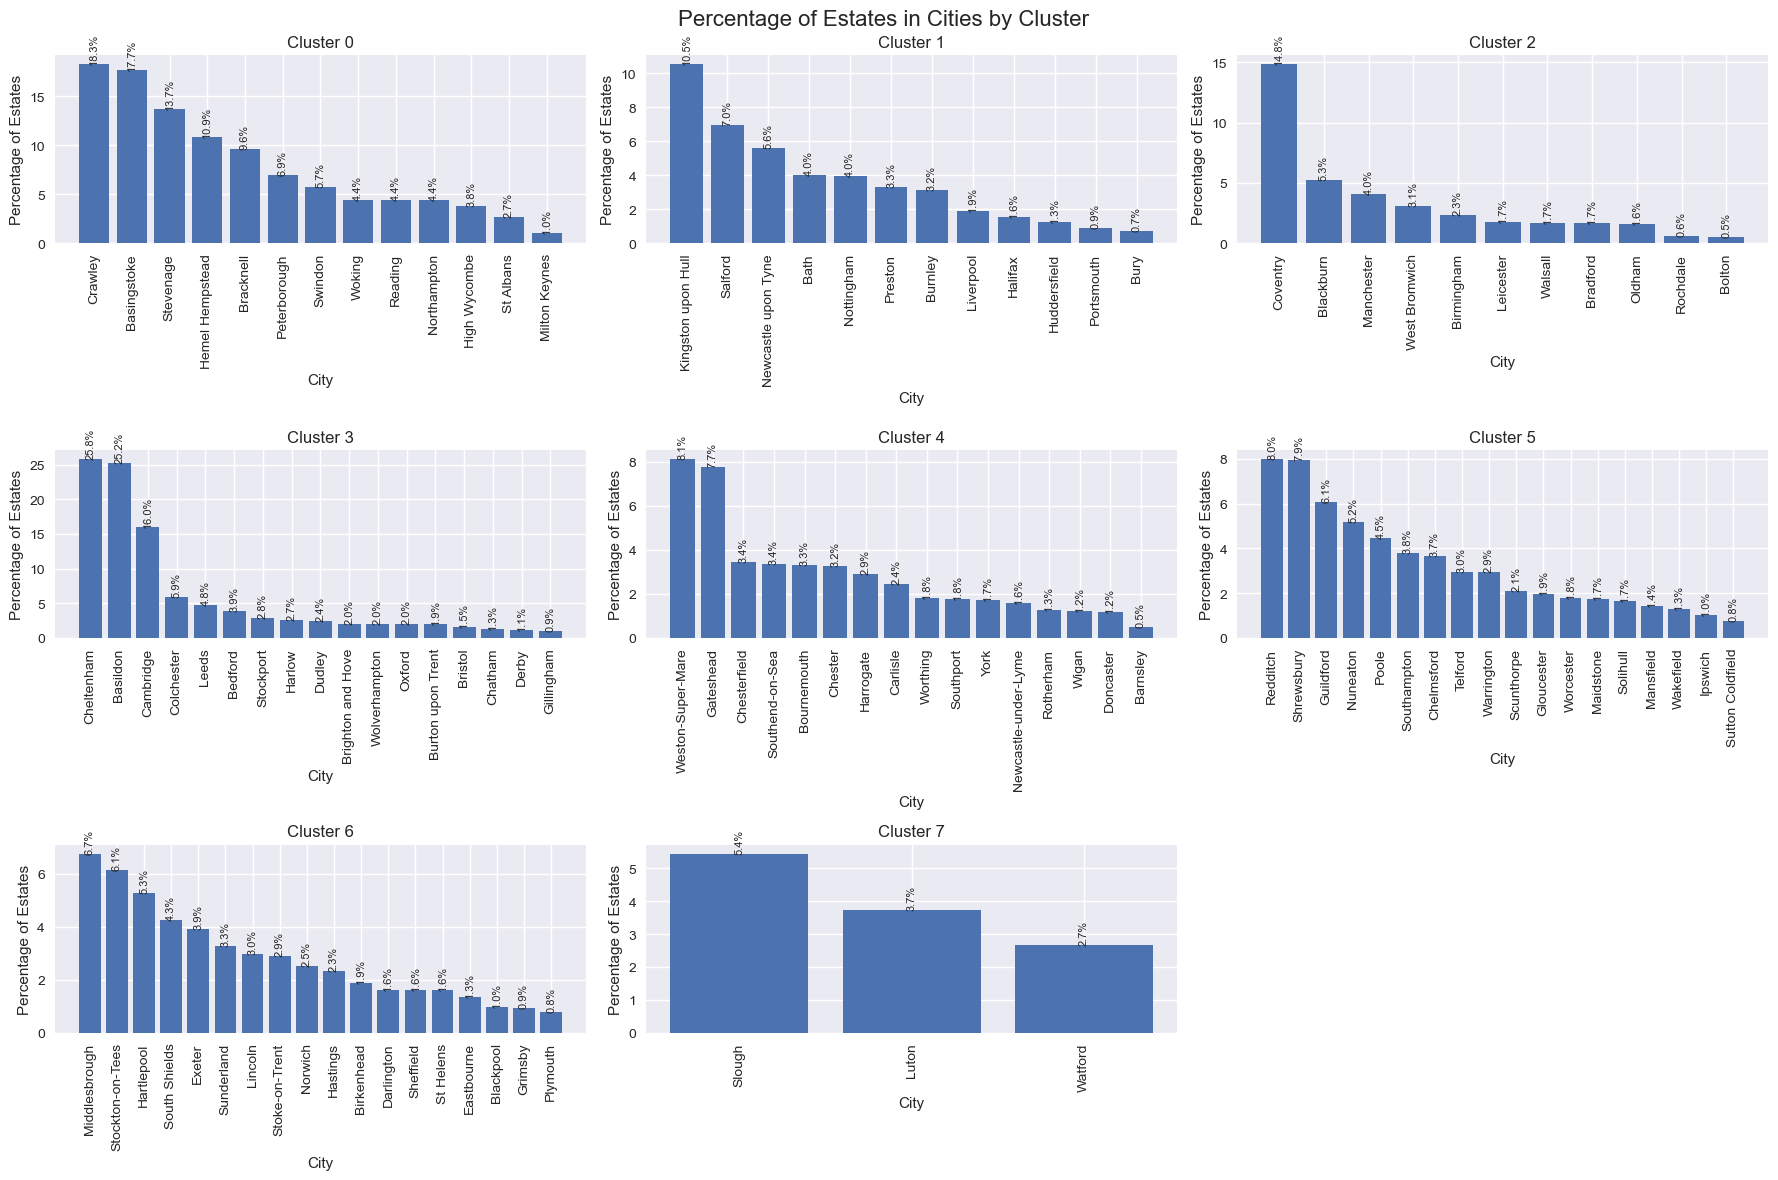

In [90]:
df = pd.read_csv("/Users/gracecolverd/City_clustering/resv3_clustering_data.csv" )
labels = pd.read_csv('/Users/gracecolverd/City_clustering/clustering_results/8/cluster_results/random_seed_1/labels.csv')
df['cluster'] = labels
plot_estates_by_cluster(df, 'cluster')

In [67]:
main_cols=['TCITY15NM',
 'perc_standard_houses',
 'perc_small_terraces',
 'perc_estates',
 'perc_age_Pre-1919',
 'perc_age_1919-1999',
 'perc_one-person_household',
 'perc_white',
 'perc_asian',
 'perc_economically_active:_employed',
 'perc_economically_inactive']

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_81825/3379270859.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


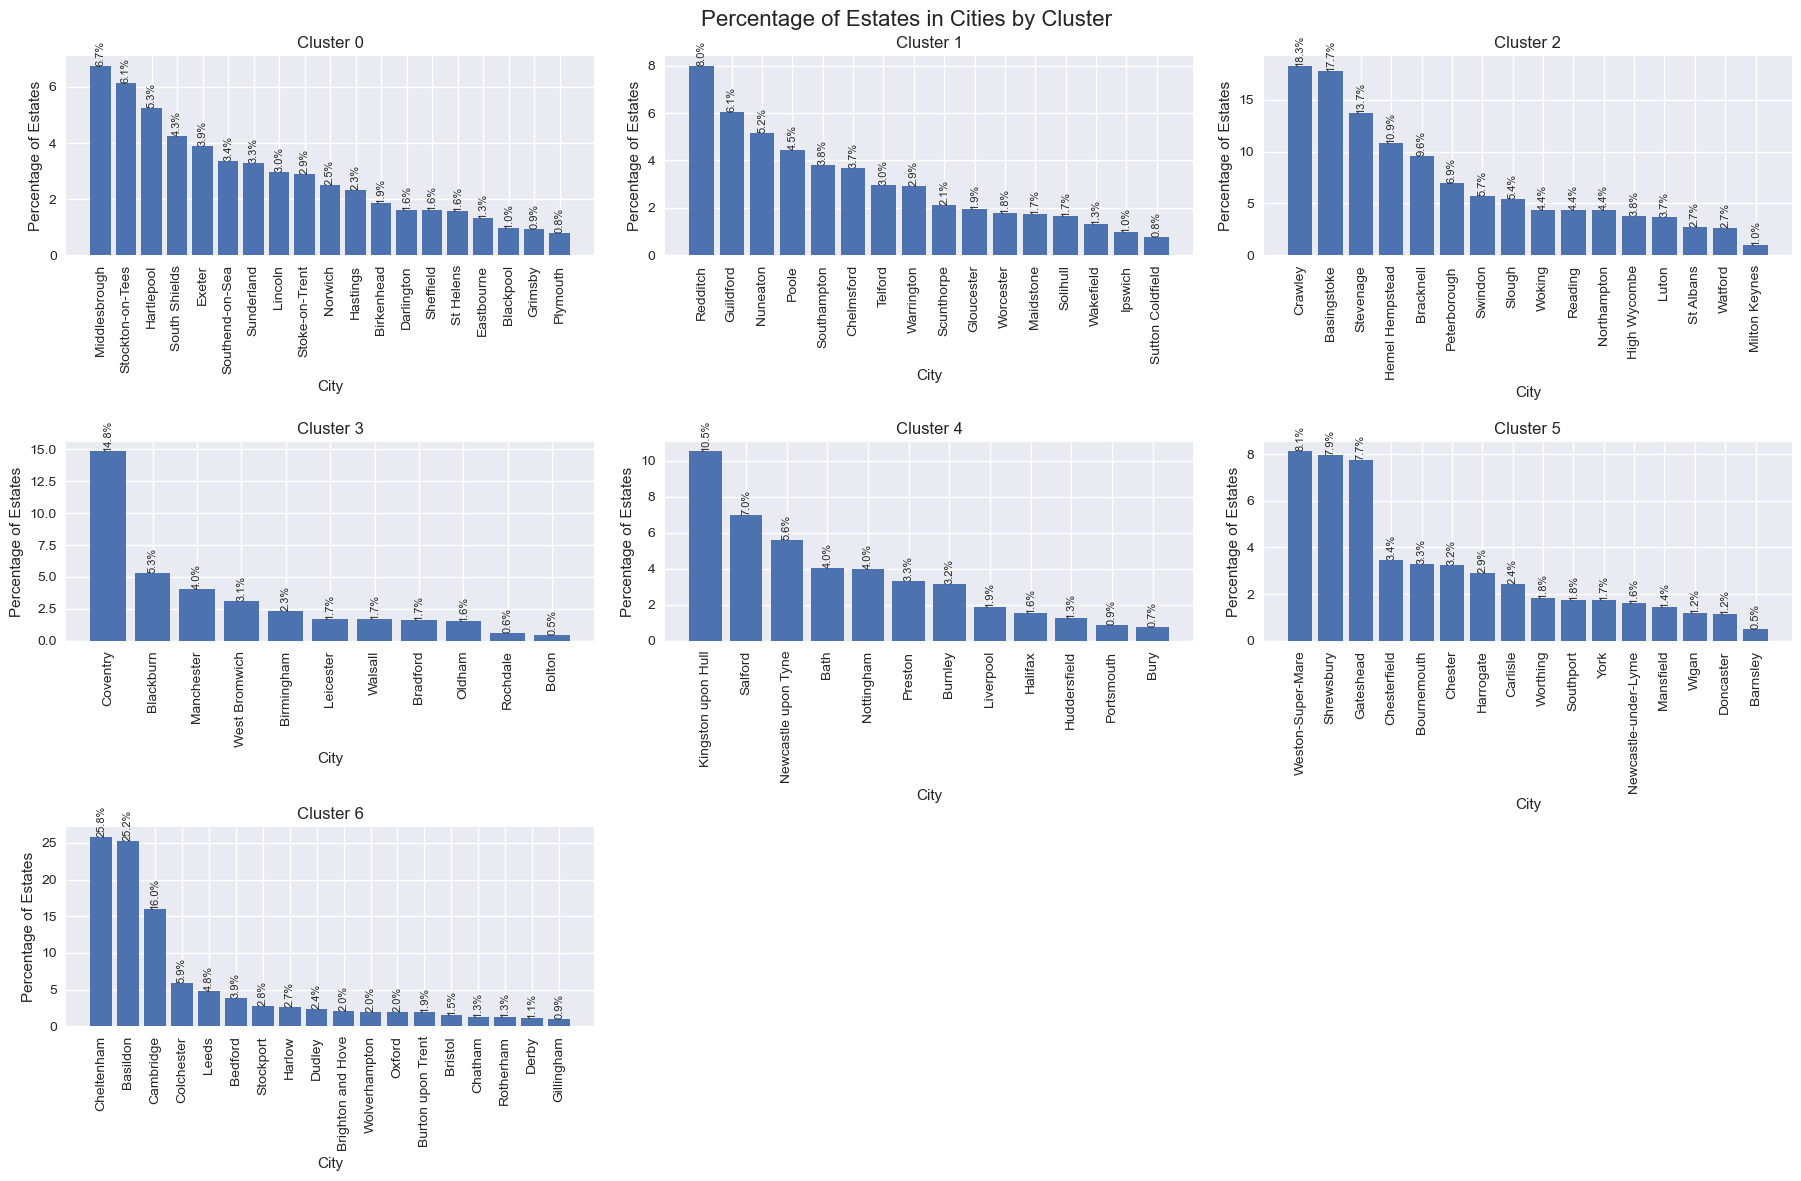

In [ ]:
plot_estates_by_cluster(df[main_cols +['lab1']], 'lab1')